**Interface for pair (key, val)**

* find
* insert
* delete

Идея **хэш-таблицы** состоит в том, чтобы индексировать элементы <key, value> по хэш-функции h. От элементов уже не требуется упорядоченность, достаточно уметь проверять равенство

* есть таблицы с открытой адресацией (ищем первое свободное место)
* есть таблицы с двумя хэшами: первый генерирует позицию, второй длину прыжка для поиска свободного элемента (желательно взаимнопростую с размерами таблицы)
* можно создавать список в каждом элементе таблицы или же дерево

Чтобы всё работало хорошо, нам надо уметь брать равномерный хэш, тогда в среднем в каждой позиции таблицы длины $M$ будет порядка $\frac{n}{M}$ элементов. Если поддерживать размер таблицы порядка уникальных элементов, то будет в среднем работать за $\mathcal{O}(1)$ операция поиска, удаления и вставки.

Для простоты (например, в случае с открытой адресацией) вместо фактического удаления элемент просто помечают "удален", а потом при расширении таблицы и генерации новой хэш-функции его не добавляют.

Идея **хэш-мапы** состоит в том, чтобы вместо хэширвоания класть элементы в двоичном дереве поиска по ключам. Это уже будет в лучшем случае 
за  $\mathcal{O}(\log n)$, но есть возможность выводить значения в порядке возрастания/убывания ключей. Да и хэш функции не нужны.

**hash**

Основные применения хэш функций:
* проверка подлинности
* построение ассоциативных массивов
* быстрый поиск

От них в идеале хочется следующее:
* быстроту вычислений
* отсутствие коллизий
* невозможность подобрать прообраз по образу
* сильная нелинейность 

Мы рассмотрим рандомизированные подходы к их построению.

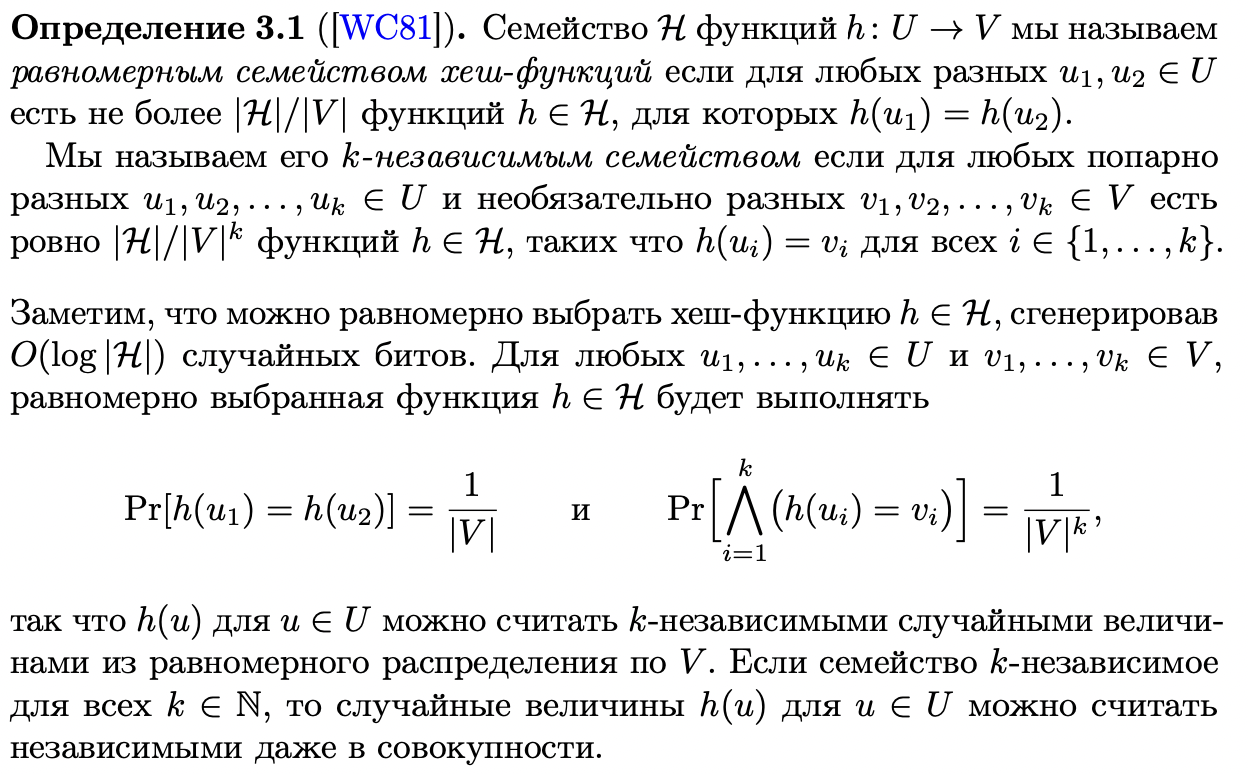

Часто хочется иметь линейный хэш. Простейший вариант линейного хэша можно представить как преобразование $Ax+b$.
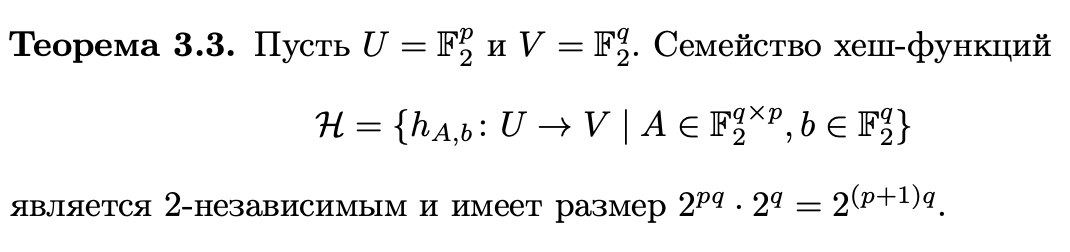

Идея доказательства в том, что если $x_1 \neq x_2$, то в некотором столбце булевый вектор разностей имеет координату 1, и она однозначно определяет весь этот столбец матрицы $A$ с вектором сдвига $b$.

Но иногда хочется $k$-независимое семейство, для этого прибегают к полиномам над конечными полями.
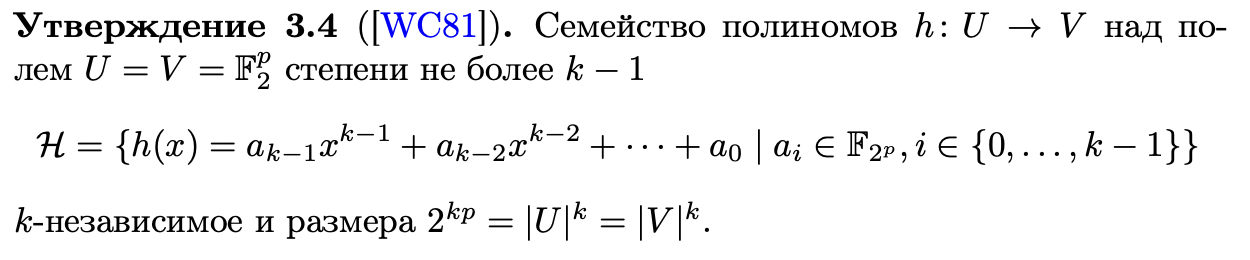

Для того, чтобы получить такое конечное поле, нам надо найти неприводимый многочлен степени $p-1$ над полем $\mathbb{F}_2$ и определить умножение на векторах в соответствии с остатками от деления представлений этих многочленов.

**На практике** можно вместо таких конечных полей брать поле $\mathbb{F}_q$ для чисел Мерсенна, или вообще для больших степеней двойки.

**Алгоритм Карпа-Рабина**

Он решает задачу поиска подстрок в строке следующим образом:
* строится скользящая полиномиальная хэш-функция от искомых подстрок 
* за один проход по массиву ищутся совпадение хэшей (на лету)
* при совпадении хэшей проверяются строки на равенство, если обнаружилась коллизия, то меняется хэш и начинается заново

Его можно модифицировать с помощью фильтров Блюма (проверять сразу несколькими хэш функциями). Можно доказать, что алгоритм в среднем работает за $\mathcal{O}(n+m)$, при этом он достаточно прост в построении, в отличие от подхода через конечные автоматы.